# Features Selection

## Intro

* Trouver et selectionner les variables les plus utiles pour développer le modèle
* Faut toujours limiter au mieux le nb de variables

## Le module feature_selection

![Alt text](assets/features_selection.png)

Il y a 
1. des transformers
    * VarianceTreshold() : sélectionne les variables en fonction de le variabilité
    * Qui sélectionnent les variables à partir de tests statistiques
        * Anova, X²... 
        * SelectKBest(), SelectPercentile()...
    * Qui sélectionnent les variables à partir des coefs d'un modèle qui a été entrainé sur tout le Dataset
        * SelectFromModel(), RFE(), RFEC()
1. des tests de dépendances 
    * Ce sont des fonctions mathématiques
    * X², Anova... : les tests utiles pour les problèmes de classification
    * Pearson...   : les tests utiles pour les problèmes de régression    * 

## VarianceTreshold()

* Elimine les variables dont la variance est inférieure à un certain seuil
* Evite de garder des variables qui ne varient pas
* Exemple, une colonne qui contient toujours le même N° de département

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


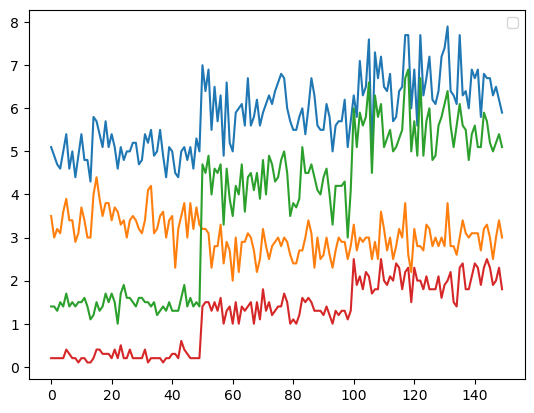

In [11]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

fig, ax = plt.subplots()
# comment faire apparaitre la légende
#ax.legend(iris.feature_names)
plt.legend(iris.feature_names)
_ = ax.plot(X)
ax.legend()



* La courbe orange varie peu par rapport aux autres
* => Utiliser le transformer VarianceTreshold

On commence par calculer les variances 



In [5]:
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [6]:
selector = VarianceThreshold(threshold=0.2)
selector.fit_transform(X)

# La colonne Sepal Width a été filtrée
# Bien voir que X n'a pas été modifié

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

* Les Transformers de Features Selection disposent d'une fonction get_support() qui permet de visualiser quelles features * ont été selectionnées.
* On récupère un tableau de bool
* On peut faire du boolean indexing

In [8]:
selector.get_support()


array([ True, False,  True,  True])

In [9]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
np.array(iris.feature_names)[selector.get_support()]



array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

On voit que sepal width n'a pas été sélectionnée

## SelectKBest()

* Plus puissant que VarianceThreshold()
* C'est une sélection de variables qui s'appuie sur des tests de dépendance
* SelectKBest() sélectionne les K variables X dont le score du test de dépendance avec y est les plus élévé

![Alt text](assets/features_selection2.png)

* X² pour comparer des variables catégorielles ensemble
* Anove, Pearson...





Un test X² retourne 2 tableaux numpy
1. Tab 1 = score X². Plus il est élévé, plus il y a une dépendance entre la variable de X et y
1. Tab 2 = contient les p-values

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

chi2(X, y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

SelectKBest() ne va garder que les variables dont les scores dans le tableau 1 sont sup à un treshold

Ici la troisième variable est très corrélée

In [16]:
selector = SelectKBest(chi2, k=1) # retient une seule variable
selector.fit_transform(X, y)      # on passe X et y car il a besoin des 2 pour le test X²
selector.get_support()            # c'est bien la 3 qu'il a gardé

array([False, False,  True, False])

In [17]:
selector = SelectKBest(chi2, k=2) # retient deux variables
selector.fit_transform(X, y)      # on passe X et y car il a besoin des 2 pour le test X²
selector.get_support()            

array([False, False,  True,  True])

Les test de dépendance supportés par SelectKBest()

![alt](assets/features_selection3.png)

1. Il faut donc commencer par choisir le bon test de dépendance en fonction du problème sur lequel on travaille.
2. Choisir le Transformer pour sélectionner au mieu les différentes variables

* SelectKBest : selectionne les K variables qui ont les meilleurs scores au test passé en paramètre
* SelectPercentile : selectionne toutes les variables dont le résultat au test est sup à un %
* ??? : selection des variables en fontion des p-values

## SelectFromModel
* On pré entraine un estimateur
* On examine ses coefs
* Pour déterminer les variables importantes

Si on antraine un modele avec les variables x1 et x2
Le coef de x2 est null (pas de correlation, x2 est pas prise en compte)
Du coup on se dit qu'on peut ne pas tenir compte de x2
Mais pour dire ça il faut avoir entrainé le modèle puis regarder ensuite les coefs

![alt](assets/features_selection4.png)

Il faut un estimateur 
* qui développe des coefs (réseaux de neurones, modèles linéaires) 
* ou alors qui calcule l'importance des variables pendant leur création (arbre de décision, les random forest...)

On ne peut pas utiliser ses Transformers sur des estimateurs de type K-NearestNeighbour (n'utilise pas de coef, retiennent en mémoire tous les échantillons fournis)





In [19]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

selector = SelectFromModel(SGDClassifier(random_state=0), threshold="mean")
selector.fit_transform(X, y) # On passe X et y car au début du Transformer il y a un Estimator SGDClassifier()
                             # qu'il faut entrainer avec X et y
                             # Il va alors développer ses coefs
                             

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

On voit que 2 variables sur 4 ont été selectionnées
get_support précise lesquelles

In [20]:
selector.get_support()

array([False, False,  True,  True])

Quels sont les coefs trouvés par l'Estimator SGDClassifier()

In [25]:
selector.estimator_ # SGDClassifier est un meta Transformator (???)
                    # Il possède une fonctionnalité d'Estimator


SGDClassifier(random_state=0)

In [22]:
selector.estimator_.coef_   # Comme tout estimateur qui développe des coefs
                            # il possède un attribut coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

### D'où sortent ces coefs ?
On a X matrice de type [150x4] 
y est de type [150x1]

In [26]:
X.shape

(150, 4)

In [27]:
y.shape

(150,)

Mais on a 3 classes dans y (setosa, versicolor et virginica)

Avec l'encodage OneHot SGDClassifier retourne 3 variables y1, y2 et y3 pour les 3 classes d'iris

y est donc du type [150x3]

X[150x4] * ??? = y[150, 3]

=> ??? est du type [4x4]
C'est la taille de la matrice paramètre $\theta$ retournée par l'attribut selector.estimator_.coef_


### QUESTION : 
* où est ce qu'on a utilisé l'encodage OneHot?
* vérifier si c'est pas par défaut ce qu'il y a dans y. Réponse non : on a que 0, 1 et 2

In [28]:
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [29]:
selector.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

Dans selector.estimator_.coef_
* Les colonnes : les coefs des différentes variables
* Les lignes : les coefs pour chaque classe de y

1. SelectFromModel() va calculer la moyenne de tous les coefs selon leurs variable (par colonne, selector.estimator_.coef_.mean1. (axis=0))
1. Il va faire la moyenne de 8, -5 et -81, idem pour les autres colonnes
1. Puis il calcule la moyenne de ces moyennes
1. Enfin il va garder les variables dont la moyenne est suppérieur àqui sont au dessus  

In [30]:
selector.estimator_.coef_.mean(axis=0)

array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])

On fait la moyenne de ces moyennes

In [31]:
selector.estimator_.coef_.mean(axis=0).mean()

-0.9721175565229512

Il garde toutes les variables dont la moyenne est supérieur à cette. Il garde donc les colonnes 2 et 3

In [32]:
selector.estimator_.coef_.mean(axis=0)


array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])

On retrouve bien le résultat de selector.get_support()

In [33]:
selector.get_support()

array([False, False,  True,  True])

## Les selecteurs RFE et RFECV

* des transformers qui permettent de choisir des variables de façon recursives
* RFE : recursive feature elimination
* RFECD : ... mais utilise la cross validation pour faire l'entrainement et l'évaluation de ses modèles
* Un estimateur est entrainé plusieurs fois. Après chaque entrainement des features sont éliminées sur la base des coefs les plus faible de l'estimateur. 
* Au départ il a 18 features. À la fin il en aura que 5 par exemple


In [35]:
from sklearn.feature_selection import RFE, RFECV

# Estimateur : SGDClassifier
# step : nombre de features à éliminer après chaque entraimentment
# min_features_to_select : le nb mini de features avec lesquelles on veut se retrouver
# cv : le nb de splits
selector = RFECV(SGDClassifier(), step=1, min_features_to_select=2, cv = 4)
selector.fit(X, y)
selector.ranking_ # retrouve le classement des features

array([1, 2, 1, 1])

In [ ]:
# selector.grid_scores_ # obsolete
                      # indiquait le score de SGDClassifier à chaque itération de RFECV

